## Part 1- Data Coding and Merging

In [20]:
#Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Import NHL Team Data and Display
NHL_Team=pd.read_csv("Assignment Data/Week 2/NHL_team.csv")
display(NHL_Team)

,Unnamed: 0,tid,name,tname,lname,tricode,abbr,sname
0,1,1,Toronto Maple Leafs,Maple Leafs,Toronto,TOR,TOR,Toronto
1,2,2,Montréal Canadiens,Canadiens,Montréal,MTL,MTL,Montréal
2,3,4,Winnipeg Jets,Jets,Winnipeg,WPG,WPG,Winnipeg
3,4,5,Washington Capitals,Capitals,Washington,WSH,WSH,Washington
4,5,6,Chicago Blackhawks,Blackhawks,Chicago,CHI,CHI,Chicago
5,6,7,St. Louis Blues,Blues,St. Louis,STL,STL,St Louis
6,7,8,Pittsburgh Penguins,Penguins,Pittsburgh,PIT,PIT,Pittsburgh
7,8,10,Edmonton Oilers,Oilers,Edmonton,EDM,EDM,Edmonton
8,9,11,Calgary Flames,Flames,Calgary,CGY,CGY,Calgary
9,10,14,Philadelphia Flyers,Flyers,Philadelphia,PHI,PHI,Philadelphia


In [22]:
#Import NHL Competition Data and Display Head
NHL_Competition=pd.read_csv("Assignment Data/Week 2/NHL_competition.csv")


In [23]:
#Import NHL Game Data and Display Head
NHL_Game=pd.read_csv("Assignment Data/Week 2/NHL_game.csv")
NHL_Game.head()

,X,gid,comp_id,date,ascore,hscore,period,status,home_away,tid
0,1,37,2,10/7/2017,NaN,NaN,NaN,NaN,away,25
1,2,67,2,10/9/2017,NaN,NaN,NaN,NaN,away,29
2,3,154,1,10/14/2013,NaN,NaN,NaN,NaN,away,29
3,4,278,1,10/24/2013,NaN,NaN,NaN,NaN,away,53
4,5,291,1,10/25/2013,NaN,NaN,NaN,NaN,away,5


In [24]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("Assignment Data/Week 2/pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


# NHL_Team data changes 

In [25]:
#In the NHL_Team dataset, we notice that the columns 'tricode' and 'abbr' are exactly the same for every team. Therefore,
#we drop the 'abbr' column. The same goes for the 'tid' and 'unnamed' columns, but their values have little meaning, so we
#drop them both. Furthermore, sname and lname have the same value, so we drop sname too. The tname and lname also seem of no purpose.
NHL_Team.drop(['abbr','Unnamed: 0', 'sname', 'tname', 'lname'], axis=1, inplace=True, errors='ignore')
NHL_Team.rename(columns={'name':'team_name'}, inplace=True)

NHL_Team.head()

,tid,team_name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI


# NHL_Competition data changes

In [26]:
#We notice that 2 columns are full of NaN values so we delete them immediately.
#tz doesn't provide some useful info since it is the same value for all instances.
#Unnamed:0 is useless once again.
NHL_Competition.drop(['start', 'end', 'tz', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')
NHL_Competition.rename(columns={'name':'competition_name'}, inplace=True)
NHL_Competition.head()

,comp_id,year,type,competition_name
0,1,2013,2,2013 NHL Regular Season
1,2,2017,2,2017 NHL Regular Season
2,2453,2013,3,2013 NHL Playoff
3,2541,2017,3,2017 NHL Playoff
4,2661,2012,2,2012 NHL Regular Season


# NHL_Game data changes

In [27]:
#NHL_Game.info()
#with the previous command we fing out that status and period are useless since they are full of NaN values.
#X also seems to be useless.
NHL_Game.drop(['status', 'period', 'X'], axis=1, inplace=True, errors='ignore')

#We see that there is only a few instances where hscore and ascore are NaN. We can inpute them with the median values (mean
#doesn't work as we need the score to be an integer)
#NHL_Game=NHL_Game.fillna(NHL_Game.median())

#Now we do the date column:
#import datetime
#NHL_Game['date']=pd.to_datetime(NHL_Game['date'])

#We have categorical values in home_away and will use dummies to change that into numerical: (OneHotEncoder 
#could also be a choice)
#dummy=pd.get_dummies(NHL_Game, columns=['home_away'])
#NHL_Game=pd.concat([NHL_Game, dummy['home_away_home']], axis=1)

#NHL_Game.rename(columns={'home_away_home':'home'}, inplace=True)

#NHL_Game.drop(["home_away"], axis=1, inplace=True, errors="ignore")

NHL_Game.head()



,gid,comp_id,date,ascore,hscore,home_away,tid
0,37,2,10/7/2017,NaN,NaN,away,25
1,67,2,10/9/2017,NaN,NaN,away,29
2,154,1,10/14/2013,NaN,NaN,away,29
3,278,1,10/24/2013,NaN,NaN,away,53
4,291,1,10/25/2013,NaN,NaN,away,5


# Merge dataframes:

In [28]:
#Now we merge the Game and Team dataframes:
NHL_Game=pd.merge(NHL_Game, NHL_Team, on=["tid"])

#Now we merge the Game and Competition dataframes:
NHL_Game=pd.merge(NHL_Game, NHL_Competition, on=["comp_id"])

NHL_Game['hgd']=NHL_Game["hscore"]-NHL_Game["ascore"]

NHL_Game=NHL_Game[pd.notnull(NHL_Game["hgd"])]
NHL_Game=NHL_Game.dropna()



#Now we do the date column:
import datetime
NHL_Game['date']=pd.to_datetime(NHL_Game['date'])
NHL_Game=NHL_Game.sort_values(by=['date'])
NHL_Game.head(15)




,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
8424,5666,5662,2010-10-07,4.0,3.0,away,66,Carolina Hurricanes,CAR,2010,2,2010 NHL Regular Season,-1.0
9944,5664,5662,2010-10-07,3.0,2.0,home,8,Pittsburgh Penguins,PIT,2010,2,2010 NHL Regular Season,-1.0
9006,5664,5662,2010-10-07,3.0,2.0,away,14,Philadelphia Flyers,PHI,2010,2,2010 NHL Regular Season,-1.0
9125,5666,5662,2010-10-07,4.0,3.0,home,35,Minnesota Wild,MIN,2010,2,2010 NHL Regular Season,-1.0
8814,5662,5662,2010-10-07,2.0,3.0,home,1,Toronto Maple Leafs,TOR,2010,2,2010 NHL Regular Season,1.0
8697,5662,5662,2010-10-07,2.0,3.0,away,2,Montréal Canadiens,MTL,2010,2,2010 NHL Regular Season,1.0
9742,5672,5662,2010-10-08,3.0,2.0,away,16,San Jose Sharks,SJS,2010,2,2010 NHL Regular Season,-1.0
9546,5681,5662,2010-10-08,2.0,1.0,home,32,Ottawa Senators,OTT,2010,2,2010 NHL Regular Season,-1.0
8975,5679,5662,2010-10-08,0.0,4.0,home,18,Detroit Red Wings,DET,2010,2,2010 NHL Regular Season,4.0
10004,5668,5662,2010-10-08,3.0,4.0,away,6,Chicago Blackhawks,CHI,2010,2,2010 NHL Regular Season,1.0


In [29]:
NHL_Home=NHL_Game[NHL_Game.home_away=="home"]
NHL_Away=NHL_Game[NHL_Game.home_away=="away"]
NHL_Home.rename(columns={"hscore":"goals_for", "ascore":"goals_against"}, inplace=True)
NHL_Away.rename(columns={"ascore":"goals_for", "hscore":"goals_against"}, inplace=True)

NHL_Home['win']=np.where(NHL_Home['goals_for']>NHL_Home['goals_against'],1,np.where(NHL_Home['goals_for']==NHL_Home['goals_against'],.5,0))
NHL_Away['win']=np.where(NHL_Away['goals_for']>NHL_Away['goals_against'],1,np.where(NHL_Away['goals_for']==NHL_Away['goals_against'],.5,0))
NHL_Home['count']=1
NHL_Away['count']=1

In [30]:
NHL_Game=pd.concat([NHL_Home, NHL_Away])
NHL_Game.head(5)

,comp_id,competition_name,count,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,year
9944,5662,2010 NHL Regular Season,1,2010-10-07,5664,3.0,2.0,-1.0,home,Pittsburgh Penguins,8,PIT,2,0.0,2010
9125,5662,2010 NHL Regular Season,1,2010-10-07,5666,4.0,3.0,-1.0,home,Minnesota Wild,35,MIN,2,0.0,2010
8814,5662,2010 NHL Regular Season,1,2010-10-07,5662,2.0,3.0,1.0,home,Toronto Maple Leafs,1,TOR,2,1.0,2010
9546,5662,2010 NHL Regular Season,1,2010-10-08,5681,2.0,1.0,-1.0,home,Ottawa Senators,32,OTT,2,0.0,2010
8975,5662,2010 NHL Regular Season,1,2010-10-08,5679,0.0,4.0,4.0,home,Detroit Red Wings,18,DET,2,1.0,2010


In [31]:
NHL_Team_Stats=NHL_Game.groupby(['tid','competition_name','type'])["win","goals_for", "goals_against"].sum().reset_index()

NHL_Game_Count=NHL_Game.groupby(['tid','competition_name','type'])["count"].sum().reset_index()
NHL_Game_Count.rename(columns={'count':'game_count'}, inplace=True)



NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Game_Count, on=["tid", "competition_name","type"])
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Team, on=["tid"])
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_PPPK, on=["tricode", "competition_name"] )

NHL_Team_Stats.head(10)

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR,30,29,5.0
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR,234,230,39.0
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0
5,1,2014 NHL Regular Season,2,29.0,209.0,258.0,78,Toronto Maple Leafs,TOR,319,343,54.0
6,1,2015 NHL Regular Season,2,29.0,196.0,238.0,79,Toronto Maple Leafs,TOR,324,307,27.0
7,1,2016 NHL Playoff,3,2.0,16.0,18.0,6,Toronto Maple Leafs,TOR,23,25,3.0
8,1,2016 NHL Regular Season,2,40.0,255.0,246.0,82,Toronto Maple Leafs,TOR,321,321,69.0
9,1,2017 NHL Playoff,3,3.0,20.0,28.0,7,Toronto Maple Leafs,TOR,26,21,4.0


In [32]:
NHL_Team_Stats["win_pct"]=NHL_Team_Stats["win"]/NHL_Team_Stats["game_count"]
NHL_Team_Stats["avg_gf"]=NHL_Team_Stats["goals_for"]/NHL_Team_Stats["game_count"]
NHL_Team_Stats["avg_ga"]=NHL_Team_Stats["goals_against"]/NHL_Team_Stats["game_count"]



In [33]:
NHL_Team_R_Stats=NHL_Team_Stats[NHL_Team_Stats.type==2]
NHL_Team_R_Stats

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.500000,3.225000,3.225000
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR,234,230,39.0,0.543478,3.130435,2.804348
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.924051,3.164557
5,1,2014 NHL Regular Season,2,29.0,209.0,258.0,78,Toronto Maple Leafs,TOR,319,343,54.0,0.371795,2.679487,3.307692
6,1,2015 NHL Regular Season,2,29.0,196.0,238.0,79,Toronto Maple Leafs,TOR,324,307,27.0,0.367089,2.481013,3.012658
8,1,2016 NHL Regular Season,2,40.0,255.0,246.0,82,Toronto Maple Leafs,TOR,321,321,69.0,0.487805,3.109756,3.000000
10,1,2017 NHL Regular Season,2,47.0,268.0,232.0,79,Toronto Maple Leafs,TOR,256,245,58.0,0.594937,3.392405,2.936709
12,2,2010 NHL Regular Season,2,43.0,213.0,203.0,79,Montréal Canadiens,MTL,399,363,69.0,0.544304,2.696203,2.569620
13,2,2011 NHL Regular Season,2,14.0,104.0,114.0,39,Montréal Canadiens,MTL,175,183,37.0,0.358974,2.666667,2.923077


## Part 2 - Descriptive and Summary Analyses

In [34]:
NHL_Game["goals_for"].describe()

count    18506.000000
mean         2.825894
std          1.654729
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: goals_for, dtype: float64

In [36]:
NHL_Game.groupby("home_away")["goals_against"].describe()

,count,mean,std,min,25%,50%,75%,max
home_away,,,,,,,,
away,9253.0,2.961958,1.688463,0.0,2.0,3.0,4.0,10.0
home,9253.0,2.689830,1.608916,0.0,1.0,3.0,4.0,10.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba118f61d0>,
      dtype=object)

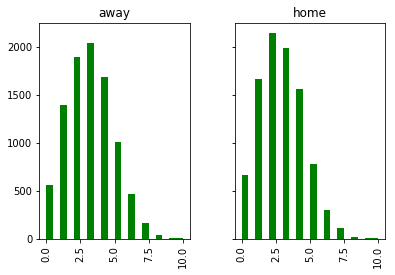

In [40]:
#NHL_Game.groupby("home_away")["goals_against"].hist()
NHL_Game.hist(by='home_away', column='goals_against', color='green', bins=20, sharex=True, sharey=True)

## Part 3 - Correlation Analyses


Text(0, 0.5, 'Winning Percentage')

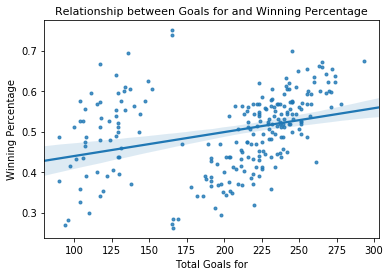

In [46]:
import seaborn as sns
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')

In [45]:
NHL_Team_R_Stats["goals_for"].corr(NHL_Team_R_Stats["win_pct"])

0.31566456280848143

Text(48.00896267361111, 0.5, 'Winning Percentage')

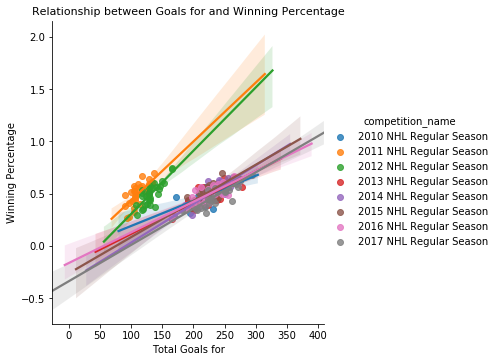

In [48]:
sns.lmplot(x='goals_for', y='win_pct', hue="competition_name" ,data=NHL_Team_R_Stats)
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')

In [52]:
NHL_Team_R_Stats.drop(NHL_Team_R_Stats[NHL_Team_R_Stats.competition_name=="2012 NHL Regular Season"].index, inplace=True)
NHL_Team_R_Stats.drop(NHL_Team_R_Stats[NHL_Team_R_Stats.competition_name=="2011 NHL Regular Season"].index, inplace=True)
NHL_Team_R_Stats

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.924051,3.164557
5,1,2014 NHL Regular Season,2,29.0,209.0,258.0,78,Toronto Maple Leafs,TOR,319,343,54.0,0.371795,2.679487,3.307692
6,1,2015 NHL Regular Season,2,29.0,196.0,238.0,79,Toronto Maple Leafs,TOR,324,307,27.0,0.367089,2.481013,3.012658
8,1,2016 NHL Regular Season,2,40.0,255.0,246.0,82,Toronto Maple Leafs,TOR,321,321,69.0,0.487805,3.109756,3.000000
10,1,2017 NHL Regular Season,2,47.0,268.0,232.0,79,Toronto Maple Leafs,TOR,256,245,58.0,0.594937,3.392405,2.936709
12,2,2010 NHL Regular Season,2,43.0,213.0,203.0,79,Montréal Canadiens,MTL,399,363,69.0,0.544304,2.696203,2.569620
17,2,2013 NHL Regular Season,2,45.5,216.0,206.0,81,Montréal Canadiens,MTL,387,385,56.0,0.561728,2.666667,2.543210
19,2,2014 NHL Regular Season,2,49.0,223.0,188.0,79,Montréal Canadiens,MTL,316,305,39.0,0.620253,2.822785,2.379747
20,2,2015 NHL Regular Season,2,35.5,211.0,229.0,78,Montréal Canadiens,MTL,293,316,57.0,0.455128,2.705128,2.935897


Text(0, 0.5, 'Winning Percentage')

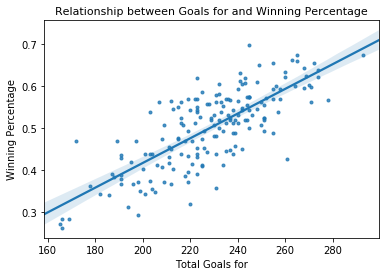

In [53]:
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')

In [54]:
NHL_Team_R_Stats["goals_for"].corr(NHL_Team_R_Stats["win_pct"])

0.7706255321801442

## Uncomment this Section once your assignment is complete

In [55]:
#Save Dataframes as .csv files
NHL_Game.to_csv("NHL_Game2.csv", index=False)
NHL_Team_Stats.to_csv("NHL_Team_Stats.csv", index=False)
NHL_Team_R_Stats.to_csv("NHL_Team_R_Stats.csv", index=False)